In [1]:
# fetch the required libraries to facilitate download of the .tgz file
import os
import tarfile
import urllib

In [2]:
# specify where to get the data and where to save in my local machine
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("../../../Data", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

In [3]:
# function to fetch the housing data
def fetch_housing(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [4]:
fetch_housing()

In [5]:
# library for data analysis
import pandas as pd
import numpy as np

In [6]:
# function to read data csv file and return pandas dataframe
def load_housing(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [7]:
housing = load_housing()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [9]:
 housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [10]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


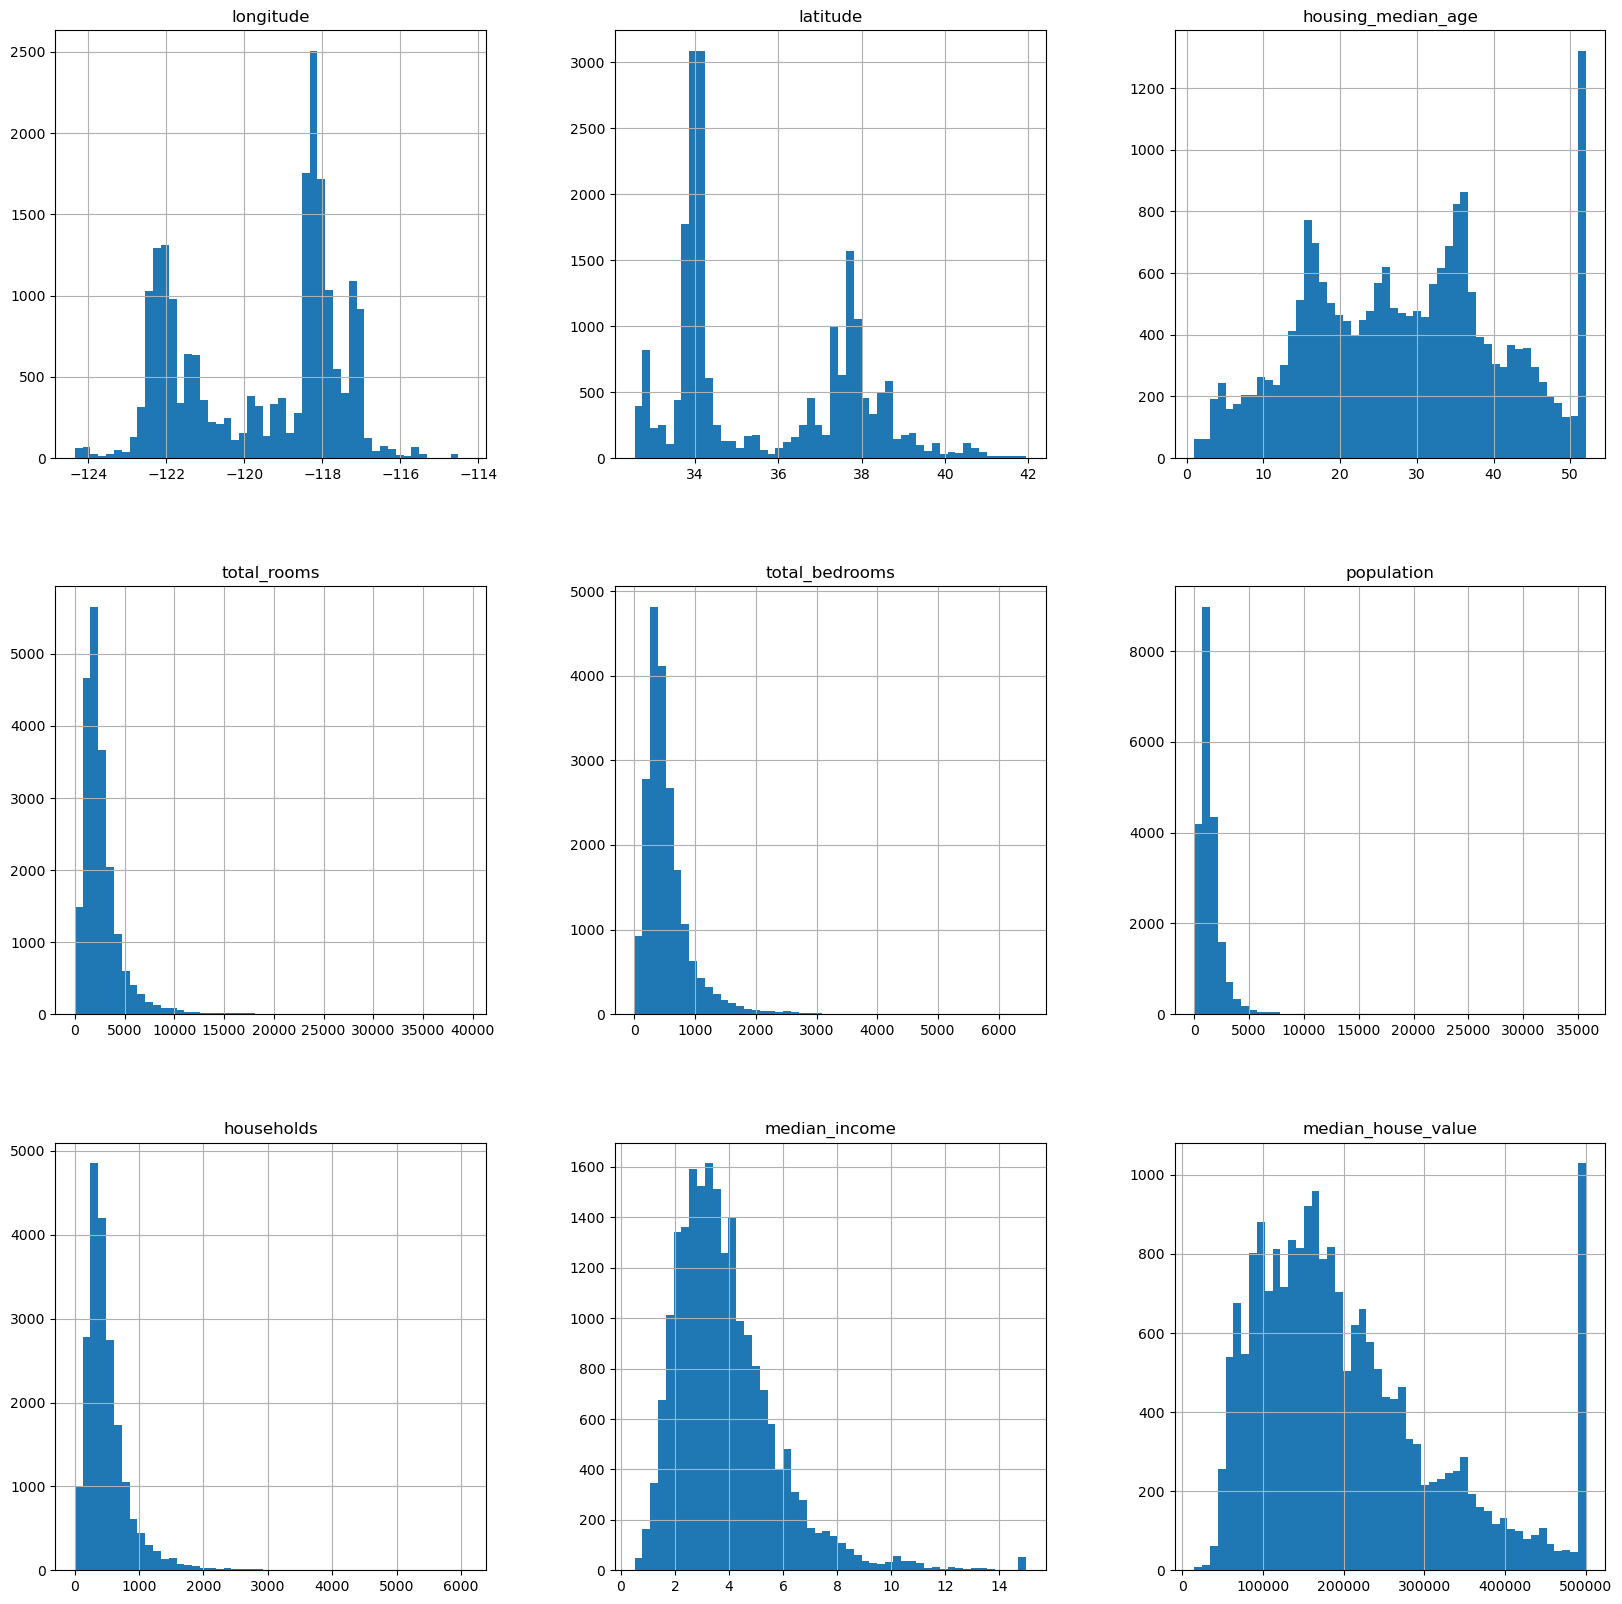

In [11]:
# this plots a histogram
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,20))
plt.show()

In [12]:
'''
# this function splits the data randomly using numpy
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
split_train_test(housing, 0.2)
'''

'\n# this function splits the data randomly using numpy\ndef split_train_test(data, test_ratio):\n    shuffled_indices = np.random.permutation(len(data))\n    test_set_size = int(len(data) * test_ratio)\n    test_indices = shuffled_indices[:test_set_size]\n    train_indices = shuffled_indices[test_set_size:]\n    return data.iloc[train_indices], data.iloc[test_indices]\nsplit_train_test(housing, 0.2)\n'

In [13]:
# does the same work as the previous code block
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2,random_state=42)

<Axes: >

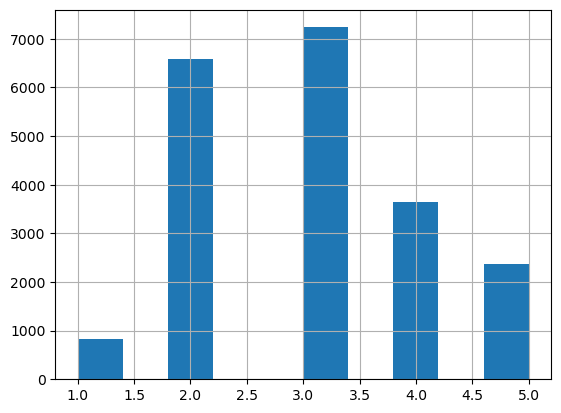

In [14]:
'''The below piece of code if for an instance where housing income is important. 
    Therefore, creating strata for each income is important'''
housing["income_cat"] = pd.cut(housing["median_income"], 
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf], 
                               labels=[1, 2, 3, 4, 5])
housing["income_cat"].hist()

In [15]:
# this code is for stratified sampling based on income category were that was an important feature. 
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [16]:
# drop the income_cat attribute so data is back to original state
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [17]:
# for data exploration we use the training set
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

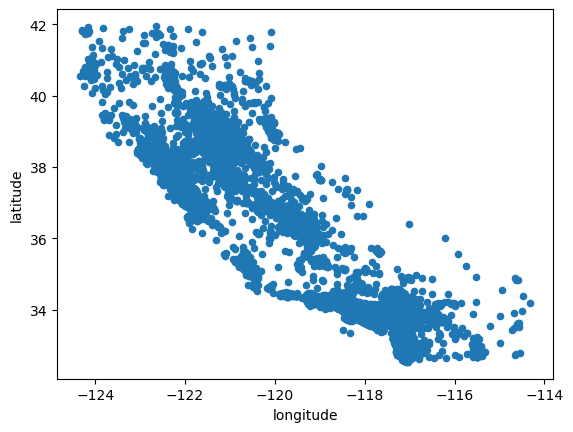

In [18]:
# plots a geographical scatterplot of the data
housing.plot(kind="scatter", x="longitude", y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

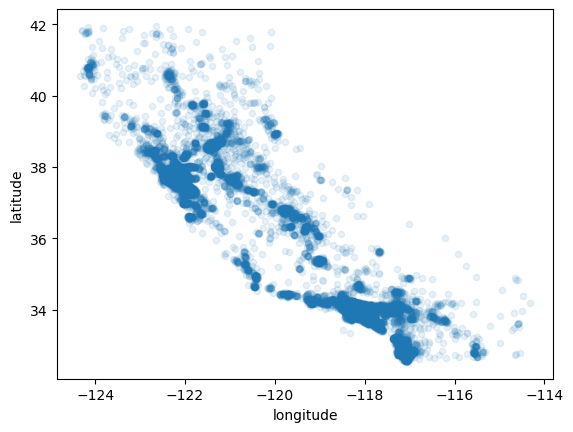

In [19]:
# plots a better visualization that highlights high-density areas
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

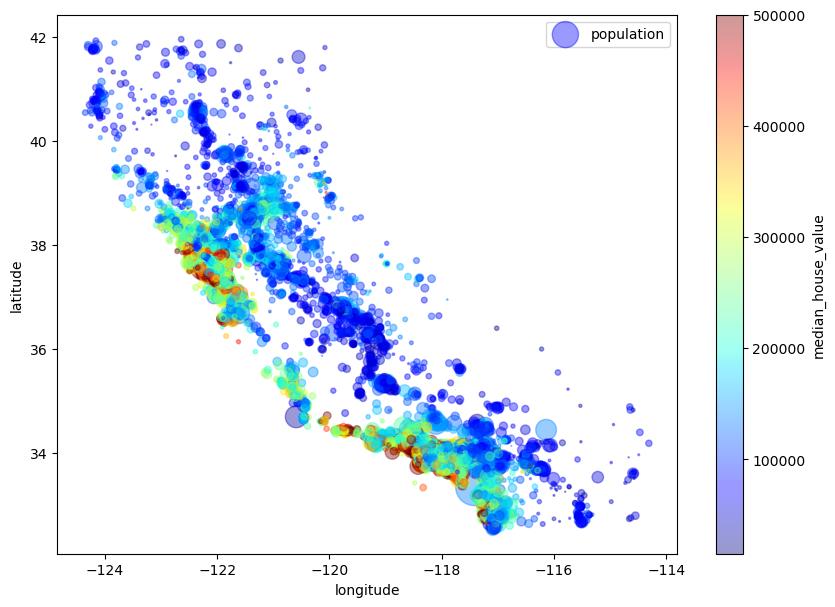

In [20]:
'''
In the below plot, red is expensive, blue is cheap, larger circles indicate areas with a larger population
'''
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
                s=housing["population"]/50, label="population", figsize=(10,7),
                c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
            )
plt.legend()


In [21]:
housing.drop("ocean_proximity", axis=1, inplace=True)
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


In [22]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

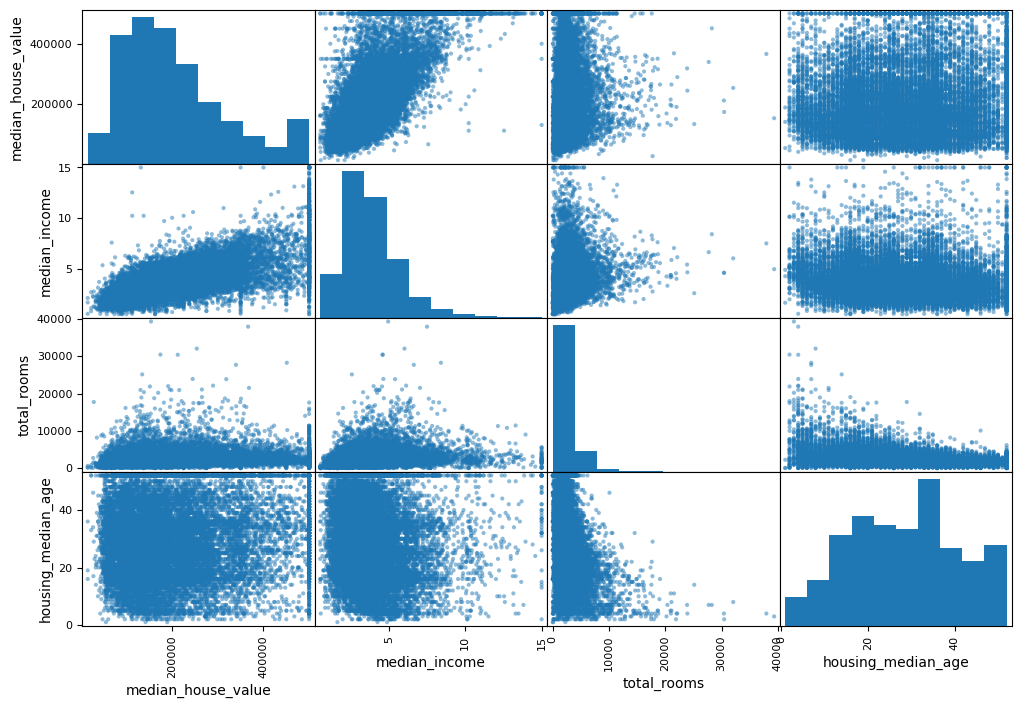

In [23]:
'''
This scatter matrix plots every numerical attribute against every other numerical
attribute, plus a histogram of each numerical attribute
'''
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

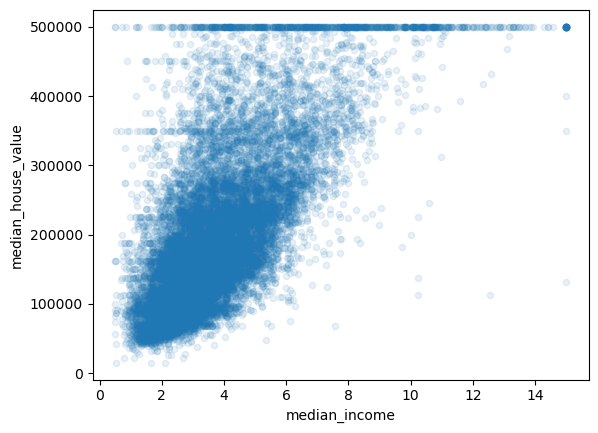

In [24]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [25]:
# combination of different attributes
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [26]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_room          -0.259952
Name: median_house_value, dtype: float64

In [27]:
# let's reload the data so as do some data cleaning
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

In [28]:
# total_bedrooms has null values so we replace nulls with median
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

In [29]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [30]:
'''
# this piece of code replaces null values 

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)
X = imputer.transform(housing_num)
housing = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)
'''

'\n# this piece of code replaces null values \n\nfrom sklearn.impute import SimpleImputer\nimputer = SimpleImputer(strategy="median")\nhousing_num = housing.drop("ocean_proximity", axis=1)\nimputer.fit(housing_num)\nX = imputer.transform(housing_num)\nhousing = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)\n'

In [31]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [32]:
'''
This method isn't appropriate for our dataset since the categorical attribute isn't ordinal

# this code converts categorical feature to numerical as ML algorithms prefer working with numbers.
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]
'''

"\nThis method isn't appropriate for our dataset since the categorical attribute isn't ordinal\n\n# this code converts categorical feature to numerical as ML algorithms prefer working with numbers.\nfrom sklearn.preprocessing import OrdinalEncoder\nordinal_encoder = OrdinalEncoder()\nhousing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)\nhousing_cat_encoded[:10]\n"

In [33]:
# OneHot encoding is preferred if categorical feature isn't ordinal
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [34]:
'''
The above output is a SciPy sparse matrix which conserves memory usage as in some 
instances of OneHot encoding, there might be alot of zeros when the categories 
in a feature are many which is wasteful.
'''

'\nThe above output is a SciPy sparse matrix which conserves memory usage as in some \ninstances of OneHot encoding, there might be alot of zeros when the categories \nin a feature are many which is wasteful.\n'

In [35]:
# this converts SciPy sparse matrix to 2D numpy array
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [36]:
'''
The below code illustrates how to create a custom transformer. 
In the below instance, the code tries to create new attributes using combination of present attributes.
'''

# TransformerMixin creates fit_transform() once you implement fit() and transform()
from sklearn.base import BaseEstimator, TransformerMixin
# in the below line, the values represent the column indexs of the respective variables as per housing
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else to do
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=True)
housing_extra_attribs = attr_adder.transform(housing.values)

In [37]:
# created a new data copy to test the below pipeline
housing_num = housing.drop("ocean_proximity", axis=1)
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16512 entries, 12655 to 19773
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [38]:
# below is an example of transformation pipeline
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),
                            ('attribs_adder', CombinedAttributesAdder()),
                            ('std_scaler', StandardScaler()),
                        ])
housing_num_tr = num_pipeline.fit_transform(housing_num)


In [39]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("cat", OneHotEncoder(), cat_attribs),
])
housing_prepared = full_pipeline.fit_transform(housing)

In [40]:
# we use a linear model for our first model
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [41]:
# testing the linear model on some sample data
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))

Predictions: [ 85657.90192014 305492.60737488 152056.46122456 186095.70946094
 244550.67966089]
Labels: [72100.0, 279600.0, 82700.0, 112500.0, 238300.0]


In [42]:
# checking the perfomance of the linear model
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68627.87390018745

In [43]:
# let's use cross-validation to test our linear model instead of the above method
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [44]:
# let's view the performance metrics 
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())
display_scores(lin_rmse_scores)

Scores: [71762.76364394 64114.99166359 67771.17124356 68635.19072082
 66846.14089488 72528.03725385 73997.08050233 68802.33629334
 66443.28836884 70139.79923956]
Mean: 69104.07998247063
Standard deviation: 2880.3282098180657


In [45]:
'''
Since the linear model underfits the data, let's try training a more complex model 
as we can't reduce the constraits on the current linear model as there are none 
and better data is a little tricky. 
'''

"\nSince the linear model underfits the data, let's try training a more complex model \nas we can't reduce the constraits on the current linear model as there are none \nand better data is a little tricky. \n"

In [46]:
# we use a decisiontreeregressor for our second model
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [47]:
# checking the performance of the decisiontreeregressor
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse


0.0

In [48]:
# let's use cross-validation to test our tree instead of the above method
tree_scores = cross_val_score(tree_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

In [49]:
# let's view the performance metrics    
display_scores(tree_rmse_scores)


Scores: [72166.7533949  70153.15746349 68916.86010837 72314.76994497
 69893.30602896 76011.25684067 72258.71362776 73879.59479609
 68343.19732878 70697.45704668]
Mean: 71463.50665806672
Standard deviation: 2221.7603131132205


In [50]:
# let's train a random forest model
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18657.685091671447

In [51]:
# let's use cross-validation to test our forest instead of the above method
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

In [52]:
# let's view the performance metrics    
display_scores(forest_rmse_scores)

Scores: [51467.8629642  48902.92627973 46940.49195649 52461.76428911
 47436.27870903 52190.50725891 52054.94680936 49890.95356086
 48750.32748732 53803.03518207]
Mean: 50389.90944970715
Standard deviation: 2211.090589107198


In [53]:
# since random forest regressor showed most promise let's fine tune it
from sklearn.model_selection import GridSearchCV
param_grid = [{'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
              {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3,4]},]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [54]:
# this is the best model from our gridsearchcv
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [56]:
# shows the different mse scores for the different models trained
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63575.37019384167 {'max_features': 2, 'n_estimators': 3}
55146.79770881132 {'max_features': 2, 'n_estimators': 10}
52908.31340976346 {'max_features': 2, 'n_estimators': 30}
61068.59014813164 {'max_features': 4, 'n_estimators': 3}
52858.02769196433 {'max_features': 4, 'n_estimators': 10}
50300.197829438555 {'max_features': 4, 'n_estimators': 30}
58841.4129581553 {'max_features': 6, 'n_estimators': 3}
52139.26806471779 {'max_features': 6, 'n_estimators': 10}
50112.59979938963 {'max_features': 6, 'n_estimators': 30}
58318.311657885104 {'max_features': 8, 'n_estimators': 3}
52807.268886351914 {'max_features': 8, 'n_estimators': 10}
50177.55313990094 {'max_features': 8, 'n_estimators': 30}
62088.273316381354 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53795.66249734372 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59267.82473979292 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52512.56260633531 {'bootstrap': False, 'max_features': 3, 'n_estimators':

In [57]:
# best features from our best model
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.08036182e-02, 7.49960652e-02, 4.27013334e-02, 1.73269343e-02,
       1.64898856e-02, 1.66394382e-02, 1.64517609e-02, 3.56850034e-01,
       6.11598748e-02, 1.08273512e-01, 5.69963829e-02, 1.40926751e-02,
       1.26383563e-01, 1.65117951e-04, 3.26806380e-03, 7.40174057e-03])

In [62]:
# let's add names to these features
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
feature_importances_named = sorted(zip(feature_importances, attributes), reverse=True)
feature_importances_named

[(0.35685003403041393, 'median_income'),
 (0.12638356277879956, 'INLAND'),
 (0.10827351228765232, 'pop_per_hhold'),
 (0.08080361820136232, 'longitude'),
 (0.07499606521931991, 'latitude'),
 (0.06115987482068215, 'rooms_per_hhold'),
 (0.056996382876017014, 'bedrooms_per_room'),
 (0.04270133339106794, 'housing_median_age'),
 (0.017326934312313243, 'total_rooms'),
 (0.016639438216905358, 'population'),
 (0.016489885594360692, 'total_bedrooms'),
 (0.016451760851597504, 'households'),
 (0.014092675094195003, '<1H OCEAN'),
 (0.0074017405746659905, 'NEAR OCEAN'),
 (0.0032680638000383766, 'NEAR BAY'),
 (0.00016511795060883443, 'ISLAND')]

In [81]:
features = pd.DataFrame(feature_importances_named, columns=['value', 'name'])

In [82]:
features

,value,name
0,0.356850,median_income
1,0.126384,INLAND
2,0.108274,pop_per_hhold
3,0.080804,longitude
4,0.074996,latitude
5,0.061160,rooms_per_hhold
6,0.056996,bedrooms_per_room
7,0.042701,housing_median_age
8,0.017327,total_rooms
9,0.016639,population


<Axes: xlabel='name'>

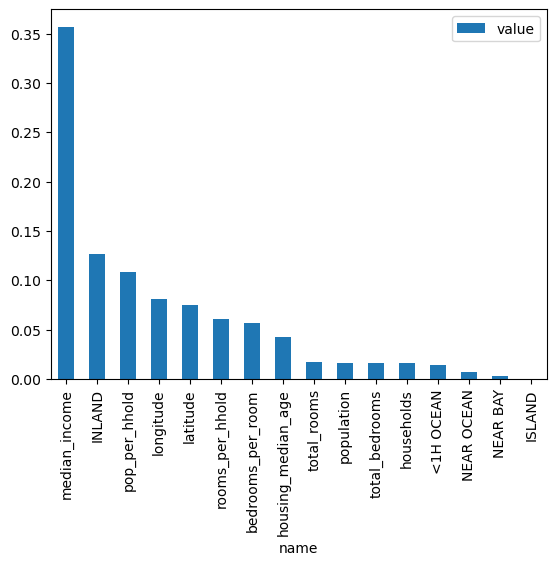

In [86]:
features.plot(kind="bar", x="name", y="value")

In [88]:
# now evaluate how best the model performs on the test data
final_model = grid_search.best_estimator_
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

47752.46085186951

In [89]:
# now we evaluate the confidence interval
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))


array([45744.93501253, 49678.9286873 ])

NameError: name 'np' is not defined